<a href="https://colab.research.google.com/github/junanote/test_deeplearning/blob/master/boston_housingwithregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data


# Dataset


In [78]:
(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz', test_split=0.2, seed=113)
x_train.shape, y_train.shape, x_test.shape, y_test.shape, type(x_train)


((404, 13), (404,), (102, 13), (102,), numpy.ndarray)

In [79]:
type(x_train)

numpy.ndarray

In [80]:
import pandas as pd 


In [81]:
dfr = pd.DataFrame(x_train)
dfr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [82]:
import sqlite3

In [83]:
connect = sqlite3.connect('./db.sqlite3')
dfr.to_sql('boston_hosing_resource', connect, if_exists='append', index=False)

In [100]:
pd.read_sql_query('select * from boston_hosing_resource',connect)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
804,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
805,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
806,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


In [99]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [106]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Scaler.fit(x_train)


TypeError: ignored

In [113]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape,x_test.shape

NotFittedError: ignored

In [114]:
df = pd.DataFrame(x_train)
df.describe() 

ValueError: ignored

# model and fit


In [87]:
model = tf.keras.models.Sequential()

In [107]:
#tf.keras.activations.rellu()
model.add(tf.keras.Input(shape=(13)))  # input layer
model.add(tf.keras.layers.Dense(128, activation='relu'))# 기능 layer
model.add(tf.keras.layers.Dense(128, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(128, activation='relu')) # hidden layer 
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(32, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(1,))

# sgd = tf.keras.optimizers.SGD(
#   learning_rate=0.001,
#   momentum=0.004,
# )
model.compile(optimizer='adam',loss='mse', metrics=['mae'])




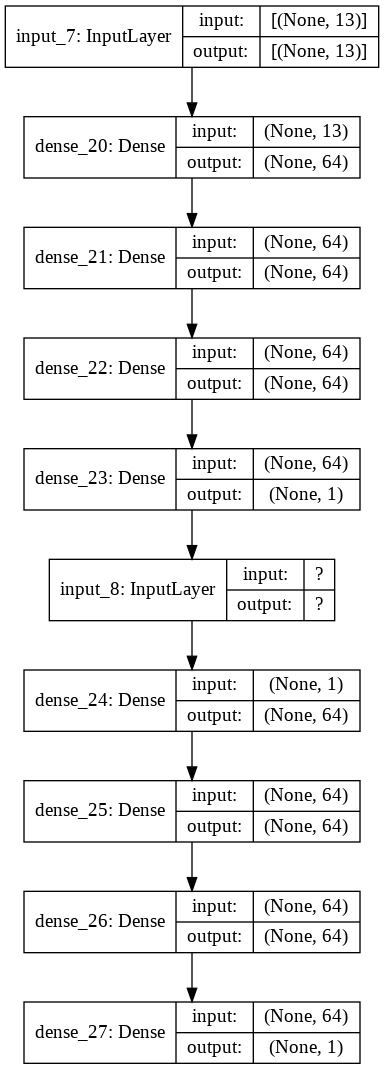

In [108]:
tf.keras.utils.plot_model(model, show_shapes=True)


In [109]:
model.summary()



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 65        
_________________________________________________________________
input_8 (InputLayer)         multiple                  0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_25 (Dense)             (None, 64)               

In [115]:
hist = model.fit(x_test, y_test, epochs=500, validation_split=0.3)


Epoch 1/500
3/3 [==============================] - 0s 90ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/500
3/3 [==============================] - 0s 11ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/500
3/3 [==============================] - 0s 13ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/500
3/3 [==============================] - 0s 12ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/500
3/3 [==============================] - 0s 10ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/500
3/3 [==============================] - 0s 12ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/500
3/3 [==============================] - 0s 11ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/500
3/3 [==============================] - 0s 11ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/500
3/3 [==============================] - 0s 11

# evaluation


In [116]:
hist.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

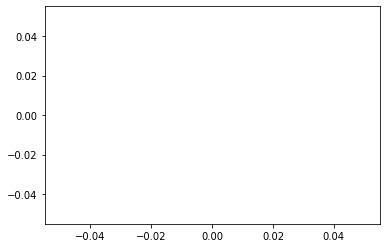

In [118]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], 'b--')
plt.plot(hist.history['val_loss'])
plt.show()

In [111]:
model.evaluate(x_train, y_train) # activation=sigmoid - loss: 36.9019 - me: 3.8349


ValueError: ignored

In [ ]:
tf.keras.utils.plot_model(model)

# service


In [ ]:
x_test[10]

In [ ]:
y_test